In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/ch07_64.txt', sep=' ', header=None)

In [7]:
df.head()

,0,1,2,3,4,5
0,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,Athens,Greece,Beijing,China,China,0.723578
3,Athens,Greece,Berlin,Germany,Germany,0.673462
4,Athens,Greece,Bern,Switzerland,Switzerland,0.491975


In [8]:
(df[3] == df[4]).sum()

14382

In [9]:
len(df)

19544

In [14]:
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

In [13]:
!ls ../

README.md   ch02        ch04        ch07        data.tar.xz
ch01        ch03        ch06        data        tmp


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


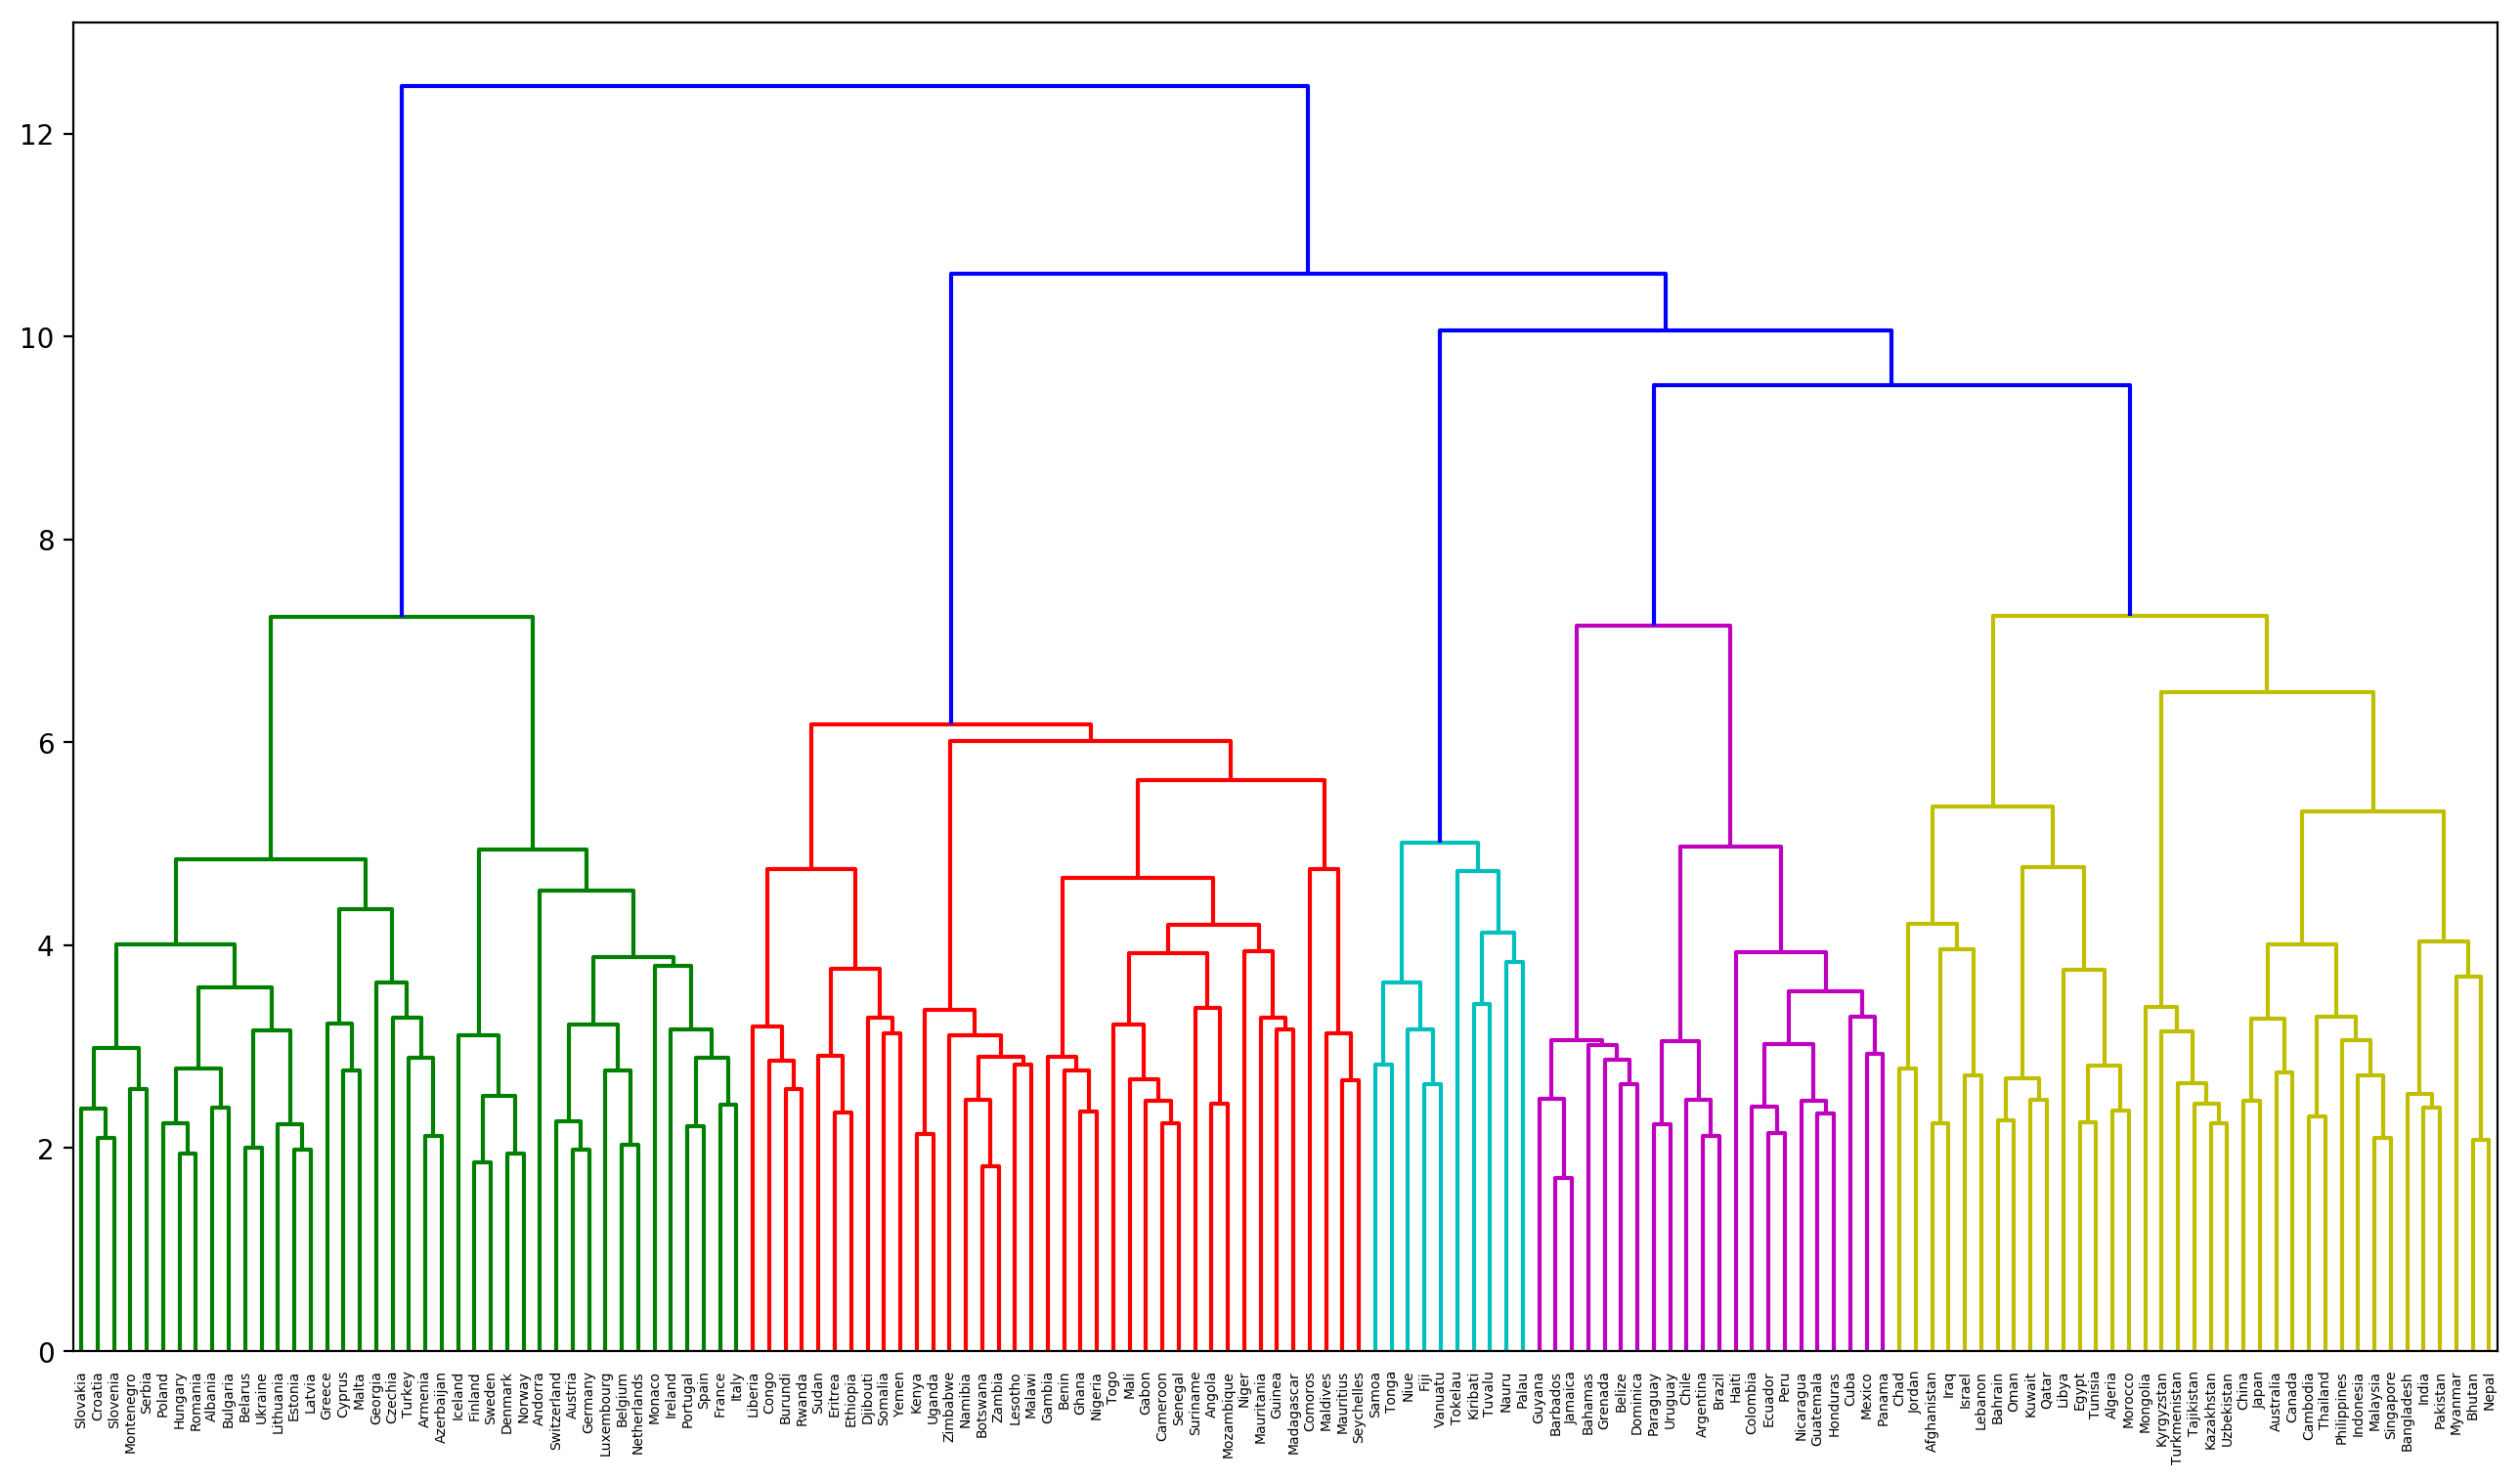

In [17]:
country = pd.read_table('../data/countries.tsv')
country = country['Short name'].values

model = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

countryVec = []
countryName = []
for c in country:
    if c in model.vocab:
        countryVec.append(model[c])
        countryName.append(c)
        
X = np.array(countryVec)
linkage_result = linkage(X, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countryName)
plt.show()